In [0]:
from google.colab import files
uploaded = files.upload()

Saving Train_dataset.csv to Train_dataset (2).csv


In [118]:
from google.colab import files
uploaded = files.upload()

Saving Test_dataset.csv to Test_dataset.csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns


from scipy.stats import skew, norm
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import matplotlib.pyplot as plt



In [335]:
gold=pd.read_csv('Train_dataset (2).csv')
gold.head(5)


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
1,13,Bhubaneshwar,Female,Mrs,karina @ kavita,NO,NaN,NaN,Public,2,0,Diabetes,18,15,<200,Stage-01,403.0,39.0,174.0,213.0,98.0,43.0,33,3,NaN,2300000,2.0,35.147520
2,19,Bhubaneshwar,Female,Mrs,rinukanwr,YES,1.0,Clerk,Public,2,0,Coronary Heart Disease,65,9,<400,Normal,181.0,80.0,177.0,287.0,52.0,66.0,37,4,3900000.0,2300000,0.0,48.868666
3,59,Bhubaneshwar,Female,Mrs,priya kumar,NO,2.0,Manufacturing,Walk,2,0,Diabetes,26,15,<300,Elevated,347.0,140.0,54.0,215.0,89.0,47.0,8,5,1700000.0,2300000,0.0,50.698176
4,98,Bhubaneshwar,Female,Mrs,jyoti,YES,2.0,Cleaner,Car,2,0,Diabetes,42,11,<400,Normal,149.0,NaN,206.0,NaN,NaN,65.0,28,3,500000.0,2300000,2.0,50.437683


In [452]:
gold1=pd.read_csv('Test_dataset.csv')
gold1.head(5)


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [337]:
gold1.shape

(14498, 27)

In [338]:
gold1.Region.value_counts()

Pune                  2503
Thiruvananthapuram    2502
Kolkata               2483
Mumbai                2475
Hyderabad             2457
Delhi                 2078
Name: Region, dtype: int64

In [339]:
print(gold['Occupation'][12])

Legal


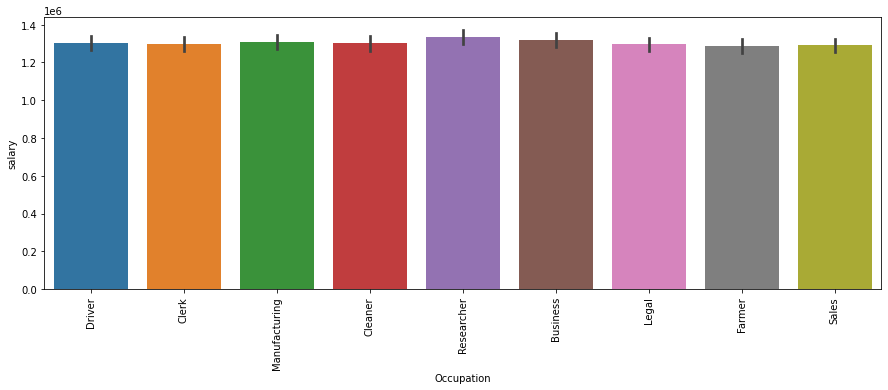

In [340]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot( gold.Occupation,gold.salary)

In [341]:
gold.Occupation.isnull().sum()

747

In [342]:
gold.Mode_transport.value_counts()

Public    3589
Walk      3569
Car       3556
Name: Mode_transport, dtype: int64

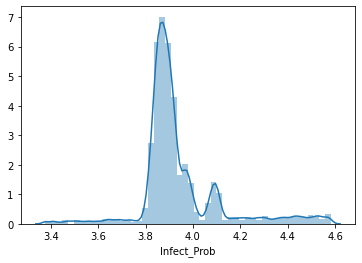

In [343]:
sns.distplot(np.log(gold['Infect_Prob']))


 mu = 52.28 and sigma = 10.67



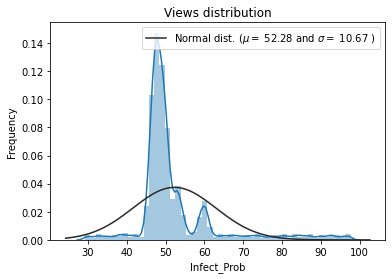

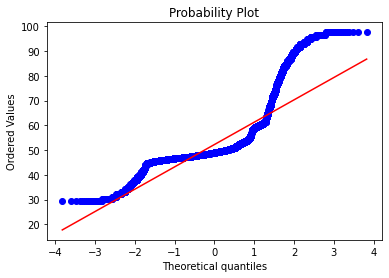

In [344]:
sns.distplot(gold['Infect_Prob'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(gold['Infect_Prob'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Views distribution')

#Create a corresponding QQ-plot
fig = plt.figure()
res = stats.probplot(gold['Infect_Prob'], plot=plt)
plt.show()


 mu = 3.96 and sigma = 0.17



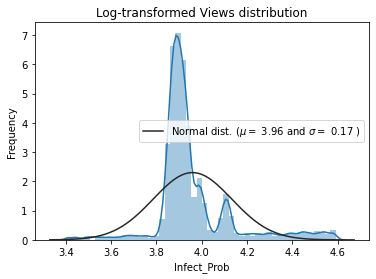

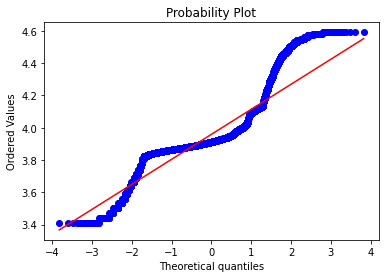

In [345]:
sns.distplot(np.log1p(gold['Infect_Prob']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(gold['Infect_Prob']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Log-transformed Views distribution')

# Create a corresponding QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(gold['Infect_Prob']), plot=plt)
plt.show()

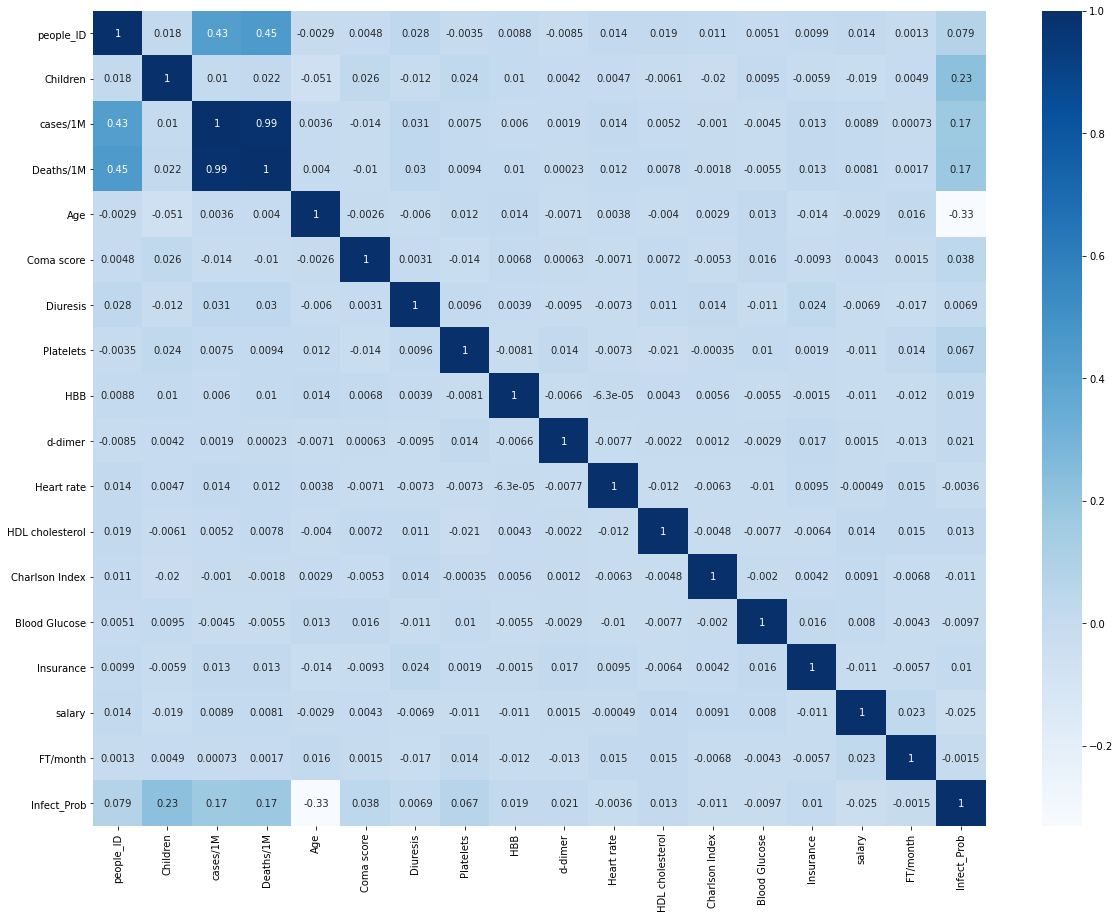

In [346]:

plt.figure(figsize=(20,15))
sns.heatmap(gold.corr(),annot=True,cmap='Blues')

In [347]:
gold.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [348]:
gold.describe(include = 'all').head(2)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.0,10714,10714,10714,10694,10714,10403.0,9967,10714,10714.0,10714.0,10488,10714.0,10714.0,10714,10617,9998.0,9790.0,10698.0,9600.0,9600.0,10679.0,10714.0,10714.0,9624.0,10714.0,9991.0,10714.0
unique,NaN,5,2,2,6304,2,NaN,9,3,NaN,NaN,4,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
gold['Children']=gold['Children'].fillna(0.0)

In [0]:
gold1['Children']=gold1['Children'].fillna(0.0)

In [351]:
for i in range (len(gold)):
  if(pd.isna(gold['Occupation'][i])):
    if(gold['Gender'][i]=='Female'):
      gold['Occupation'][i]='FN'
    else:
      gold['Occupation'][i]='MN'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
for i in range (len(gold1)):
  if(pd.isna(gold1['Occupation'][i])):
    if(gold1['Gender'][i]=='Female'):
      gold1['Occupation'][i]='FN'
    else:
      gold1['Occupation'][i]='MN'

In [353]:
gold.Occupation.value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
FN                390
MN                357
Name: Occupation, dtype: int64

In [0]:
l1 = ['Chennai','Bengaluru','Chandigarh','Bhubaneshwar','Delhi'  ]
l2 = list(range(len(l1)))
d = dict(zip(l1,l2))

In [0]:

dg= {0:0,1:0,2:0,3:0,4:1,8:2,11:2,13:2}
    

In [0]:
l3 = ['Legal','Sales', 'Manufacturing','Researcher','Farmer','Cleaner','Clerk' ,'Driver','Business','FN','MN']
l4 = list(range(len(l3)))
d1 = dict(zip(l3,l4))


In [0]:
l3g = ['Legal','Sales', 'Manufacturing','Researcher','Farmer','Cleaner','Clerk' ,'Driver','Business','FN','MN']
l4g = list(range(len(l3)))
d1g = dict(zip(l3,l4))


In [358]:
print(l4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [359]:
gold.Occupation.value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
FN                390
MN                357
Name: Occupation, dtype: int64

In [0]:
gold['cases/1M'] = gold['cases/1M'].map(dg)
gold['Occupation'] = gold['Occupation'].map(d1)

In [0]:
gold1['cases/1M'] = gold1['cases/1M'].map(dg)
gold1['Occupation'] = gold1['Occupation'].map(d1g)

In [362]:
gold.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,7,Car,0,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
1,13,Bhubaneshwar,Female,Mrs,karina @ kavita,NO,0.0,9,Public,0,0,Diabetes,18,15,<200,Stage-01,403.0,39.0,174.0,213.0,98.0,43.0,33,3,NaN,2300000,2.0,35.147520
2,19,Bhubaneshwar,Female,Mrs,rinukanwr,YES,1.0,6,Public,0,0,Coronary Heart Disease,65,9,<400,Normal,181.0,80.0,177.0,287.0,52.0,66.0,37,4,3900000.0,2300000,0.0,48.868666
3,59,Bhubaneshwar,Female,Mrs,priya kumar,NO,2.0,2,Walk,0,0,Diabetes,26,15,<300,Elevated,347.0,140.0,54.0,215.0,89.0,47.0,8,5,1700000.0,2300000,0.0,50.698176
4,98,Bhubaneshwar,Female,Mrs,jyoti,YES,2.0,5,Car,0,0,Diabetes,42,11,<400,Normal,149.0,NaN,206.0,NaN,NaN,65.0,28,3,500000.0,2300000,2.0,50.437683


In [363]:
gold.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [364]:
gold.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                  float64
Occupation                  int64
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [0]:
def cl(dep):
    if (dep >= 28 and dep <= 41):
        return 1
    else:
        return 0

def pl(dep):
    if (dep >= 150 and dep <= 400):
        return 1
    else:
        return 0

def chl(dep):
    if (dep >= 40 and dep <= 60):
        return 1
    else:
        return 0

def hr(dep):
    if (dep >= 60.0 and dep <= 100.0):
        return 1
    else:
        return 0

def bg(dep):
    float(dep)
    if (dep >= 3.9 and dep <= 7.1):
        return 1
    else:
        return 0

def du(dep):
    float(dep)
    if (dep <=250):
        return 1
    else:
        return 0

def ag(dep):
    if (dep >=0):
        return 1
    else:
        return 0

In [0]:
gold['Age'] =gold['Age'].apply(ag) 

In [0]:
gold['Charlson Index'] =gold['Charlson Index'].apply(cl)  
gold['Platelets'] =gold['Platelets'].apply(pl)  
gold['HDL cholesterol'] =gold['HDL cholesterol'].apply(chl)  
gold['Heart rate'] =gold['Heart rate'].apply(hr)  
gold['BG'] =gold['Blood Glucose'].apply(bg)  
gold['d-dimer'] =gold['d-dimer'].apply(du)  
 

In [0]:
gold1['Charlson Index'] =gold1['Charlson Index'].apply(cl)  
gold1['Platelets'] =gold1['Platelets'].apply(pl)  
gold1['HDL cholesterol'] =gold1['HDL cholesterol'].apply(chl)  
gold1['Heart rate'] =gold1['Heart rate'].apply(hr)  
gold1['BG'] =gold1['Blood Glucose'].apply(bg)  
gold1['d-dimer'] =gold1['d-dimer'].apply(du)  
gold1['Age'] =gold1['Age'].apply(ag) 
 

In [0]:
gold=gold.drop('Blood Glucose',axis=1)

In [0]:
gold1=gold1.drop('Blood Glucose',axis=1)

In [371]:
gold.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Insurance,salary,FT/month,Infect_Prob,BG
0,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,7,Car,0,0,Coronary Heart Disease,1,9,<200,Stage-01,410.0,0,167.0,0,1,1,0,700000.0,2300000,1.0,48.779225,1
1,13,Bhubaneshwar,Female,Mrs,karina @ kavita,NO,0.0,9,Public,0,0,Diabetes,1,15,<200,Stage-01,403.0,0,174.0,1,1,1,1,NaN,2300000,2.0,35.147520,0
2,19,Bhubaneshwar,Female,Mrs,rinukanwr,YES,1.0,6,Public,0,0,Coronary Heart Disease,1,9,<400,Normal,181.0,0,177.0,0,0,0,1,3900000.0,2300000,0.0,48.868666,1
3,59,Bhubaneshwar,Female,Mrs,priya kumar,NO,2.0,2,Walk,0,0,Diabetes,1,15,<300,Elevated,347.0,0,54.0,1,1,1,0,1700000.0,2300000,0.0,50.698176,1
4,98,Bhubaneshwar,Female,Mrs,jyoti,YES,2.0,5,Car,0,0,Diabetes,1,11,<400,Normal,149.0,0,206.0,0,0,0,1,500000.0,2300000,2.0,50.437683,0


In [0]:
gold=gold.drop('people_ID',axis=1)

In [0]:
gold=gold.drop('Designation',axis=1)

In [0]:
gold=gold.drop('Gender',axis=1)

In [0]:
gold1=gold1.drop(['Gender','Designation','people_ID'],axis=1)

In [376]:
gold.isnull().sum()

Region                       0
Name                        20
Married                      0
Children                     0
Occupation                   0
Mode_transport               0
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                    0
HBB                         16
d-dimer                      0
Heart rate                   0
HDL cholesterol              0
Charlson Index               0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
BG                           0
dtype: int64

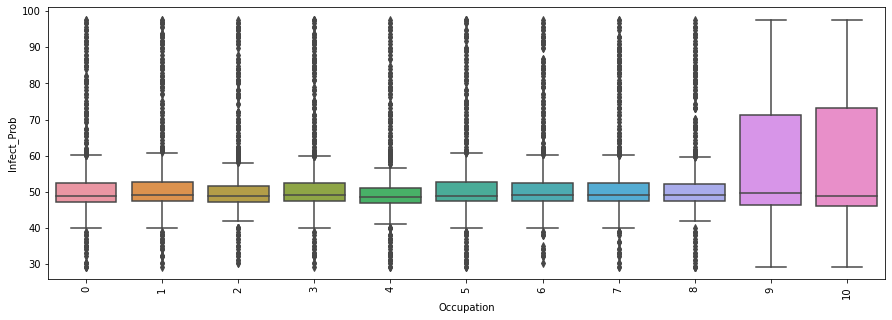

In [377]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['Occupation'], gold.Infect_Prob)

In [378]:
gold.Occupation.isnull().sum()

0

In [325]:
gold.dtypes

Region                     object
Name                       object
Married                    object
Children                  float64
Occupation                  int64
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [0]:
gold['Occupation']=gold['Occupation'].fillna('No')

In [0]:
gold['comorbidity']=gold['comorbidity'].fillna('None')

In [0]:
gold1['Occupation']=gold1['Occupation'].fillna('No')
gold1['comorbidity']=gold1['comorbidity'].fillna('None')


In [382]:
#gold.Occupation.isnull().sum()
gold.head()

,Region,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Insurance,salary,FT/month,Infect_Prob,BG
0,Bhubaneshwar,anjali @ babli,YES,1.0,7,Car,0,0,Coronary Heart Disease,1,9,<200,Stage-01,410.0,0,167.0,0,1,1,0,700000.0,2300000,1.0,48.779225,1
1,Bhubaneshwar,karina @ kavita,NO,0.0,9,Public,0,0,Diabetes,1,15,<200,Stage-01,403.0,0,174.0,1,1,1,1,NaN,2300000,2.0,35.147520,0
2,Bhubaneshwar,rinukanwr,YES,1.0,6,Public,0,0,Coronary Heart Disease,1,9,<400,Normal,181.0,0,177.0,0,0,0,1,3900000.0,2300000,0.0,48.868666,1
3,Bhubaneshwar,priya kumar,NO,2.0,2,Walk,0,0,Diabetes,1,15,<300,Elevated,347.0,0,54.0,1,1,1,0,1700000.0,2300000,0.0,50.698176,1
4,Bhubaneshwar,jyoti,YES,2.0,5,Car,0,0,Diabetes,1,11,<400,Normal,149.0,0,206.0,0,0,0,1,500000.0,2300000,2.0,50.437683,0


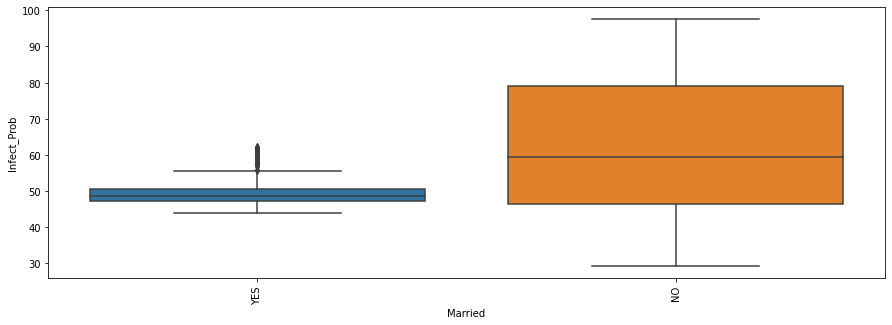

In [383]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['Married'], gold.Infect_Prob)

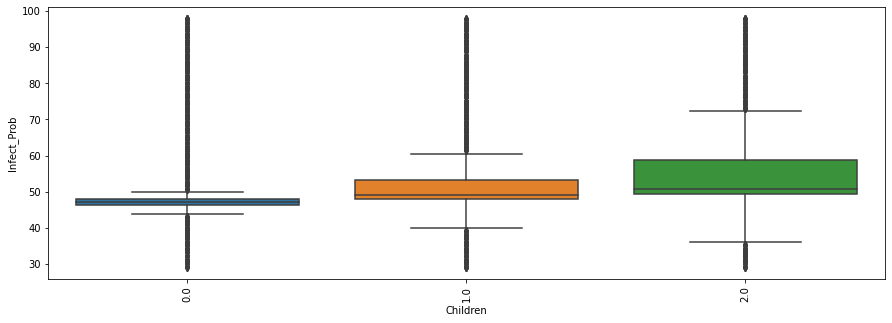

In [331]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['Children'], gold.Infect_Prob)

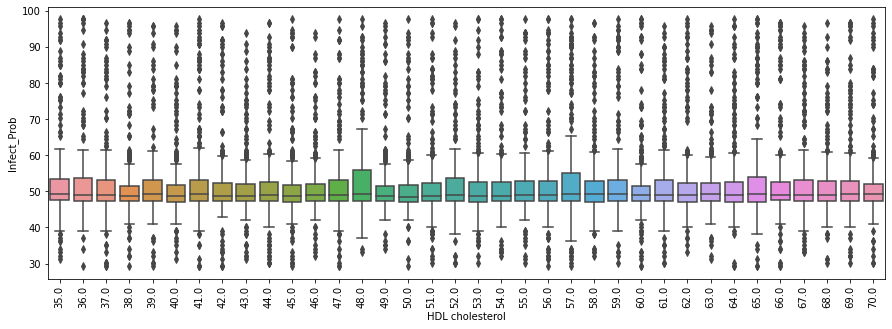

In [332]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['HDL cholesterol'], gold.Infect_Prob)

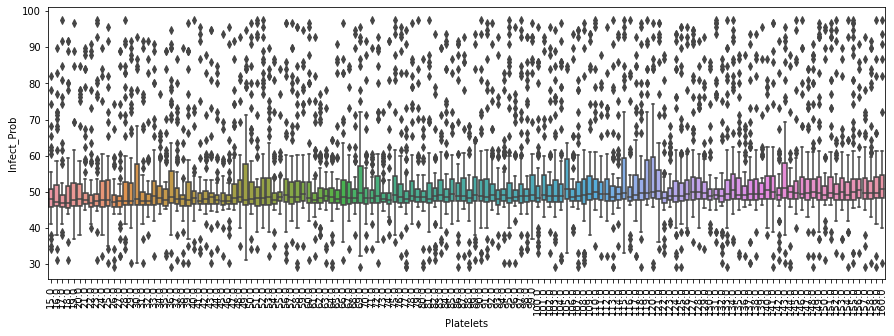

In [333]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['Platelets'], gold.Infect_Prob)

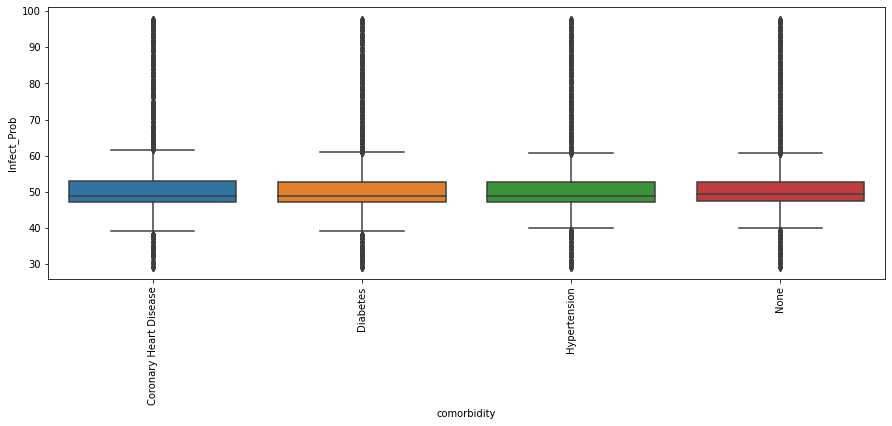

In [213]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold.comorbidity, gold.Infect_Prob)

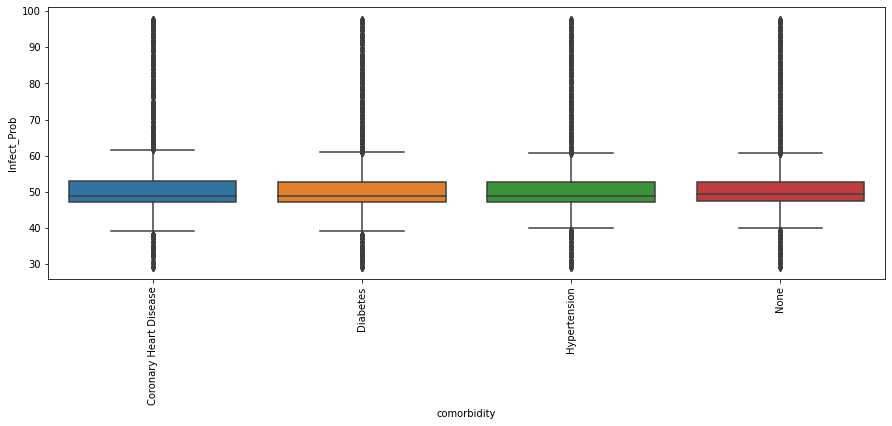

In [214]:


plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold.comorbidity, gold.Infect_Prob)

In [215]:
gold.salary.value_counts()

2300000    558
900000     542
2000000    534
1200000    533
2100000    533
400000     533
1500000    524
1300000    518
1600000    514
800000     510
1700000    508
600000     506
700000     502
1400000    501
300000     500
1000000    495
1900000    490
1800000    487
500000     486
2200000    480
1100000    460
Name: salary, dtype: int64

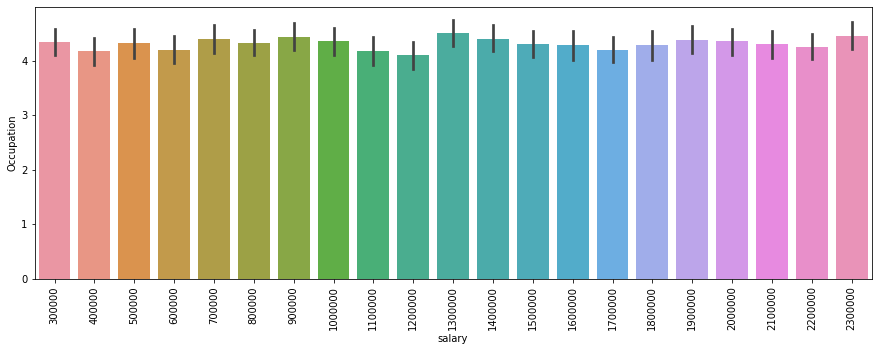

In [216]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(gold.salary, gold.Occupation)

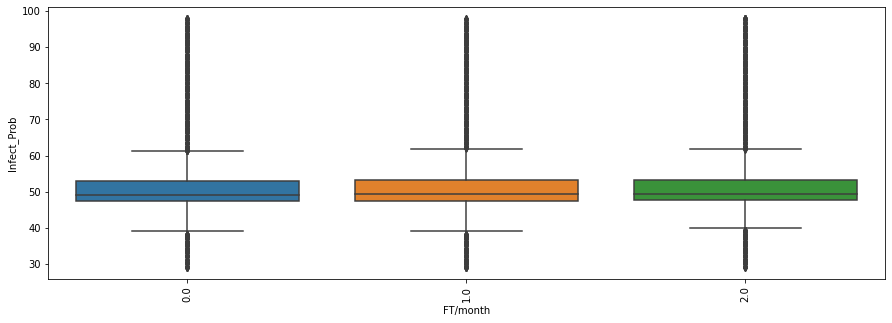

In [217]:

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['FT/month'], gold.Infect_Prob)

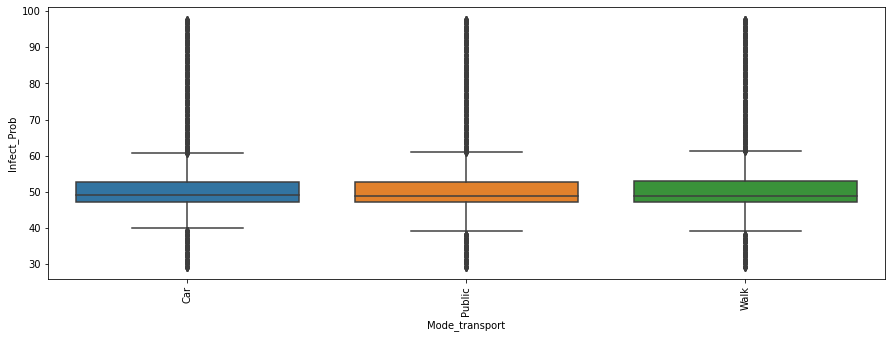

In [218]:

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(gold['Mode_transport'], gold.Infect_Prob)

In [0]:
gold['FT/month']=gold['FT/month'].fillna(0.0)
gold['Insurance']=gold['Insurance'].fillna(0.0)

In [0]:
gold1['FT/month']=gold1['FT/month'].fillna(0.0)
gold1['Insurance']=gold1['Insurance'].fillna(0.0)

In [386]:
gold.isnull().sum()

Region                      0
Name                       20
Married                     0
Children                    0
Occupation                  0
Mode_transport              0
cases/1M                    0
Deaths/1M                   0
comorbidity                 0
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                  716
Platelets                   0
HBB                        16
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
BG                          0
dtype: int64

In [0]:
gold=gold.drop('Diuresis',axis=1)

In [0]:
gold=gold.drop('HBB',axis=1)


In [0]:
gold=gold.drop('cardiological pressure',axis=1)

In [0]:
gold1=gold1.drop(['cardiological pressure','Diuresis','HBB'],axis=1)

In [391]:
gold['Heart rate'].value_counts()

1    7657
0    3057
Name: Heart rate, dtype: int64

In [392]:
gold.describe()

,Children,Occupation,cases/1M,Deaths/1M,Age,Coma score,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Insurance,salary,FT/month,Infect_Prob,BG
count,10714.000000,10714.000000,10714.000000,10714.000000,10714.0,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,1.071400e+04,1.071400e+04,10714.000000,10714.000000,10714.000000
mean,1.031921,4.312022,0.523241,0.523241,1.0,9.013067,0.066455,0.298395,0.714672,0.571589,0.318182,2.375835e+06,1.304713e+06,0.936812,52.280680,0.808008
std,0.825766,2.866648,0.854303,0.854303,0.0,3.714970,0.249088,0.457575,0.451591,0.494872,0.465792,1.535675e+06,6.075947e+05,0.826621,10.674667,0.393885
min,0.000000,0.000000,0.000000,0.000000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e+05,0.000000,29.289600,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+06,8.000000e+05,0.000000,47.277426,1.000000
50%,1.000000,4.000000,0.000000,0.000000,1.0,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.400000e+06,1.300000e+06,1.000000,49.008389,1.000000
75%,2.000000,7.000000,1.000000,1.000000,1.0,12.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.700000e+06,1.800000e+06,2.000000,52.762313,1.000000
max,2.000000,10.000000,2.000000,2.000000,1.0,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+06,2.300000e+06,2.000000,97.632000,1.000000


In [393]:
gold.head()

,Region,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Insurance,salary,FT/month,Infect_Prob,BG
0,Bhubaneshwar,anjali @ babli,YES,1.0,7,Car,0,0,Coronary Heart Disease,1,9,<200,0,0,1,1,0,700000.0,2300000,1.0,48.779225,1
1,Bhubaneshwar,karina @ kavita,NO,0.0,9,Public,0,0,Diabetes,1,15,<200,0,1,1,1,1,0.0,2300000,2.0,35.147520,0
2,Bhubaneshwar,rinukanwr,YES,1.0,6,Public,0,0,Coronary Heart Disease,1,9,<400,0,0,0,0,1,3900000.0,2300000,0.0,48.868666,1
3,Bhubaneshwar,priya kumar,NO,2.0,2,Walk,0,0,Diabetes,1,15,<300,0,1,1,1,0,1700000.0,2300000,0.0,50.698176,1
4,Bhubaneshwar,jyoti,YES,2.0,5,Car,0,0,Diabetes,1,11,<400,0,0,0,0,1,500000.0,2300000,2.0,50.437683,0


In [0]:
gold=gold.drop(['Insurance','salary'],axis=1)

In [398]:
gold.columns

Index(['Region', 'Married', 'Children', 'Occupation', 'Mode_transport',
       'cases/1M', 'Deaths/1M', 'comorbidity', 'Age', 'Coma score',
       'Platelets', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'FT/month', 'Infect_Prob', 'BG'],
      dtype='object')

In [0]:
gold=gold.drop(['Region',	'Deaths/1M'],axis=1)

In [402]:
gold.head()

,Married,Children,Occupation,Mode_transport,cases/1M,comorbidity,Age,Coma score,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,FT/month,Infect_Prob,BG
0,YES,1.0,7,Car,0,Coronary Heart Disease,1,9,0,0,1,1,0,1.0,48.779225,1
1,NO,0.0,9,Public,0,Diabetes,1,15,0,1,1,1,1,2.0,35.147520,0
2,YES,1.0,6,Public,0,Coronary Heart Disease,1,9,0,0,0,0,1,0.0,48.868666,1
3,NO,2.0,2,Walk,0,Diabetes,1,15,0,1,1,1,0,0.0,50.698176,1
4,YES,2.0,5,Car,0,Diabetes,1,11,0,0,0,0,1,2.0,50.437683,0


In [403]:
gold=gold.drop(['Name'],axis=1)

KeyError: ignored

In [404]:
gold=gold.drop(['Pulmonary score'],axis=1)

KeyError: ignored

In [0]:
gold=gold.drop(['Coma score'],axis=1)

In [0]:
gold1=gold1.drop(['Coma score','Pulmonary score','Name','Region',	'Deaths/1M','Insurance','salary'],axis=1)

In [407]:
gold.head()

,Married,Children,Occupation,Mode_transport,cases/1M,comorbidity,Age,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,FT/month,Infect_Prob,BG
0,YES,1.0,7,Car,0,Coronary Heart Disease,1,0,0,1,1,0,1.0,48.779225,1
1,NO,0.0,9,Public,0,Diabetes,1,0,1,1,1,1,2.0,35.147520,0
2,YES,1.0,6,Public,0,Coronary Heart Disease,1,0,0,0,0,1,0.0,48.868666,1
3,NO,2.0,2,Walk,0,Diabetes,1,0,1,1,1,0,0.0,50.698176,1
4,YES,2.0,5,Car,0,Diabetes,1,0,0,0,0,1,2.0,50.437683,0


In [0]:
l5 = ['Car','Walk','Public']
l6 = list(range(len(l5)))
d2 = dict(zip(l5,l6))

l7 = ['None','Hypertension','Diabetes','Coronary Heart Disease']
l8 = list(range(len(l7)))
d3 = dict(zip(l7,l8))


In [0]:
l5g = ['Car','Walk','Public']
l6g = list(range(len(l5g)))
d2g = dict(zip(l5g,l6g))

l7g = ['None','Hypertension','Diabetes','Coronary Heart Disease']
l8g = list(range(len(l7g)))
d3g = dict(zip(l7g,l8g))


In [410]:
gold.Mode_transport.value_counts()

Public    3589
Walk      3569
Car       3556
Name: Mode_transport, dtype: int64

In [0]:

gold['Mode_transport'] = gold['Mode_transport'].map(d2)
gold['comorbidity'] = gold['comorbidity'].map(d3)

In [0]:

gold1['Mode_transport'] = gold1['Mode_transport'].map(d2g)
gold1['comorbidity'] = gold1['comorbidity'].map(d3g)

In [413]:
gold.head()

,Married,Children,Occupation,Mode_transport,cases/1M,comorbidity,Age,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,FT/month,Infect_Prob,BG
0,YES,1.0,7,0,0,3,1,0,0,1,1,0,1.0,48.779225,1
1,NO,0.0,9,2,0,2,1,0,1,1,1,1,2.0,35.147520,0
2,YES,1.0,6,2,0,3,1,0,0,0,0,1,0.0,48.868666,1
3,NO,2.0,2,1,0,2,1,0,1,1,1,0,0.0,50.698176,1
4,YES,2.0,5,0,0,2,1,0,0,0,0,1,2.0,50.437683,0


In [0]:
gold= pd.get_dummies(gold, columns=['Married'], drop_first=True)


In [0]:
gold= pd.get_dummies(gold, columns=['Children'], drop_first=True)


In [0]:
gold= pd.get_dummies(gold, columns=['FT/month'], drop_first=True)


In [0]:
gold1= pd.get_dummies(gold1, columns=['Married'], drop_first=True)
gold1= pd.get_dummies(gold1, columns=['Children'], drop_first=True)
gold1= pd.get_dummies(gold1, columns=['FT/month'], drop_first=True)


In [418]:
gold.head()

,Occupation,Mode_transport,cases/1M,comorbidity,Age,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Infect_Prob,BG,Married_YES,Children_1.0,Children_2.0,FT/month_1.0,FT/month_2.0
0,7,0,0,3,1,0,0,1,1,0,48.779225,1,1,1,0,1,0
1,9,2,0,2,1,0,1,1,1,1,35.147520,0,0,0,0,0,1
2,6,2,0,3,1,0,0,0,0,1,48.868666,1,1,1,0,0,0
3,2,1,0,2,1,0,1,1,1,0,50.698176,1,0,0,1,0,0
4,5,0,0,2,1,0,0,0,0,1,50.437683,0,1,0,1,0,1


In [419]:
gold.shape

(10714, 17)

In [420]:
gold.dtypes

Occupation           int64
Mode_transport       int64
cases/1M             int64
comorbidity          int64
Age                  int64
Platelets            int64
d-dimer              int64
Heart rate           int64
HDL cholesterol      int64
Charlson Index       int64
Infect_Prob        float64
BG                   int64
Married_YES          uint8
Children_1.0         uint8
Children_2.0         uint8
FT/month_1.0         uint8
FT/month_2.0         uint8
dtype: object

In [421]:
gold['Infect_Prob']

0        48.779225
1        35.147520
2        48.868666
3        50.698176
4        50.437683
           ...    
10709    74.200320
10710    91.774080
10711    59.869682
10712    46.943607
10713    41.981760
Name: Infect_Prob, Length: 10714, dtype: float64

In [0]:
gold['Infect_Prob'] = np.log1p(gold['Infect_Prob'])

In [423]:
gold.head()

,Occupation,Mode_transport,cases/1M,comorbidity,Age,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Infect_Prob,BG,Married_YES,Children_1.0,Children_2.0,FT/month_1.0,FT/month_2.0
0,7,0,0,3,1,0,0,1,1,0,3.907598,1,1,1,0,1,0
1,9,2,0,2,1,0,1,1,1,1,3.587608,0,0,0,0,0,1
2,6,2,0,3,1,0,0,0,0,1,3.909393,1,1,1,0,0,0
3,2,1,0,2,1,0,1,1,1,0,3.945422,1,0,0,1,0,0
4,5,0,0,2,1,0,0,0,0,1,3.940371,0,1,0,1,0,1


In [0]:
X = gold.drop(labels=['Infect_Prob'], axis=1)
y = gold['Infect_Prob'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [143]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((8035, 16), (8035,), (2679, 16), (2679,))

In [0]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [151]:

import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',
         'num_iterations': 3000,   
         'learning_rate': 0.06,  
         'num_leaves': 40,  
         'max_depth': 24,   
         'min_data_in_leaf':11,  
         'max_bin': 4, 
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=1000,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred2))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1000]	valid_0's rmse: 0.184344
[2000]	valid_0's rmse: 0.191639
[3000]	valid_0's rmse: 0.196326
RMSLE: 0.1928763605974425


In [146]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=9, 
                   learning_rate=0.5, 
                   n_estimators=112, 
                   silent=False, 
                   objective='reg:linear', 
                   booster='gbtree', 
                   n_jobs=1, 
                   nthread=None, 
                   gamma=0, 
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=1, 
                   colsample_bytree=1, 
                   colsample_bylevel=1, 
                   reg_alpha=1, 
                   reg_lambda=1, 
                   scale_pos_weight=1, 
                   base_score=0.5, 
                   random_state=0, 
                   seed=None)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred1))))
#RMSLE:0.11124007381703037

[06:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 0.16445363476823147


In [147]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=50, 
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=False, 
                      oob_score=False, 
                      warm_start=False, 
                      n_jobs=1, 
                      random_state=1, 
                      verbose=0)
br.fit(X_train, y_train)
y_pred3 = br.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred3))))
#RMSLE:0.11265336177662688

RMSLE: 0.16768124010979626


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.3, 
                               n_estimators=380, 
                               subsample=1.0, 
                               criterion='friedman_mse', 
                               min_samples_split=30, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_depth=7, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               init=None, 
                               random_state=0, 
                               max_features=None, 
                               alpha=0.9, 
                               verbose=100, 
                               max_leaf_nodes=None, 
                               warm_start=False, 
                               presort='auto')
gb.fit(X_train, y_train)
y_pred4 = gb.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred4))))
#RMSLE:0.11014737617371691

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           0.0243            3.61s
         2           0.0217            3.51s
         3           0.0203            3.49s
         4           0.0192            3.48s
         5           0.0186            3.43s
         6           0.0181            3.40s
         7           0.0177            3.37s
         8           0.0173            3.36s
         9           0.0170            3.34s
        10           0.0168            3.32s
        11           0.0164            3.30s
        12           0.0161            3.28s
        13           0.0158            3.27s
        14           0.0156            3.27s
        15           0.0154            3.26s
        16           0.0153            3.25s
        17           0.0151            3.24s
        18           0.0149            3.24s
        19           0.0148            3.24s
        20           0.0147            3.23s
        21           0.0146            3.22s
        2

In [152]:
y_pred = y_pred1*0.40 + y_pred2*0.10 + y_pred3*0.40 + y_pred4*0.10
print('RMSLE:', sqrt(mean_squared_log_error(np.exp(y_cv), np.exp(y_pred))))

RMSLE: 0.16768366971623438


In [0]:
y_pred = np.exp(y_pred)


In [154]:
y_pred

array([59.82842859, 61.79320839, 54.4614477 , ..., 48.96960738,
       60.51427611, 49.49825742])

In [0]:
gold =gold.reindex(sorted(gold.columns), axis=1)
gold1 = gold1.reindex(sorted(gold1.columns), axis=1)

In [252]:
print(gold.shape)

(10714, 17)


In [253]:
print(gold1.shape)

(14498, 16)


In [254]:
gold.columns

Index(['Age', 'BG', 'Charlson Index', 'Children_1.0', 'Children_2.0',
       'FT/month_1.0', 'FT/month_2.0', 'HDL cholesterol', 'Heart rate',
       'Infect_Prob', 'Married_YES', 'Mode_transport', 'Occupation',
       'Platelets', 'Region', 'comorbidity', 'd-dimer'],
      dtype='object')

In [255]:
gold1.columns

Index(['Age', 'BG', 'Charlson Index', 'Children_1', 'Children_2', 'FT/month_1',
       'FT/month_2', 'HDL cholesterol', 'Heart rate', 'Married_YES',
       'Mode_transport', 'Occupation', 'Platelets', 'Region', 'comorbidity',
       'd-dimer'],
      dtype='object')

In [431]:
gold.dtypes

Occupation           int64
Mode_transport       int64
cases/1M             int64
comorbidity          int64
Age                  int64
Platelets            int64
d-dimer              int64
Heart rate           int64
HDL cholesterol      int64
Charlson Index       int64
Infect_Prob        float64
BG                   int64
Married_YES          uint8
Children_1.0         uint8
Children_2.0         uint8
FT/month_1.0         uint8
FT/month_2.0         uint8
dtype: object

In [432]:
gold.head()

,Occupation,Mode_transport,cases/1M,comorbidity,Age,Platelets,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Infect_Prob,BG,Married_YES,Children_1.0,Children_2.0,FT/month_1.0,FT/month_2.0
0,7,0,0,3,1,0,0,1,1,0,3.907598,1,1,1,0,1,0
1,9,2,0,2,1,0,1,1,1,1,3.587608,0,0,0,0,0,1
2,6,2,0,3,1,0,0,0,0,1,3.909393,1,1,1,0,0,0
3,2,1,0,2,1,0,1,1,1,0,3.945422,1,0,0,1,0,0
4,5,0,0,2,1,0,0,0,0,1,3.940371,0,1,0,1,0,1


In [257]:
gold1.dtypes

Age                  int64
BG                   int64
Charlson Index       int64
Children_1           uint8
Children_2           uint8
FT/month_1           uint8
FT/month_2           uint8
HDL cholesterol      int64
Heart rate           int64
Married_YES          uint8
Mode_transport       int64
Occupation           int64
Platelets            int64
Region             float64
comorbidity          int64
d-dimer              int64
dtype: object

In [0]:
gold1['Children_1.0']=gold1['Children_1']        
gold1['Children_2.0']=gold1['Children_2']         
gold1['FT/month_1.0']=gold1['FT/month_1']        
gold1['FT/month_2.0']=gold1['FT/month_2'] 

In [0]:
gold1=gold1.drop(['Children_1','Children_2','FT/month_1','FT/month_2'],axis=1)

In [0]:
gold =gold.reindex(sorted(gold.columns), axis=1)
gold1 = gold1.reindex(sorted(gold1.columns), axis=1)

In [436]:
gold.shape

(10714, 17)

In [437]:
gold1.shape

(14498, 16)

In [438]:
gold1.isnull().sum()

Age                0
BG                 0
Charlson Index     0
Children_1.0       0
Children_2.0       0
FT/month_1.0       0
FT/month_2.0       0
HDL cholesterol    0
Heart rate         0
Married_YES        0
Mode_transport     0
Occupation         0
Platelets          0
cases/1M           0
comorbidity        0
d-dimer            0
dtype: int64

In [439]:
gold.columns


Index(['Age', 'BG', 'Charlson Index', 'Children_1.0', 'Children_2.0',
       'FT/month_1.0', 'FT/month_2.0', 'HDL cholesterol', 'Heart rate',
       'Infect_Prob', 'Married_YES', 'Mode_transport', 'Occupation',
       'Platelets', 'cases/1M', 'comorbidity', 'd-dimer'],
      dtype='object')

In [440]:
gold1.columns

Index(['Age', 'BG', 'Charlson Index', 'Children_1.0', 'Children_2.0',
       'FT/month_1.0', 'FT/month_2.0', 'HDL cholesterol', 'Heart rate',
       'Married_YES', 'Mode_transport', 'Occupation', 'Platelets', 'cases/1M',
       'comorbidity', 'd-dimer'],
      dtype='object')

In [0]:
X_train =gold.drop(labels='Infect_Prob', axis=1)
y_train = gold['Infect_Prob'].values

X_test = gold1

In [442]:

X_train.shape, X_test.shape

((10714, 16), (14498, 16))

In [443]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=9, 
                   learning_rate=0.5, 
                   n_estimators=112, 
                   silent=False, 
                   objective='reg:linear', 
                   booster='gbtree', 
                   n_jobs=1, 
                   nthread=None, 
                   gamma=0, 
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=1, 
                   colsample_bytree=1, 
                   colsample_bylevel=1, 
                   reg_alpha=0.89, 
                   reg_lambda=1, 
                   scale_pos_weight=1, 
                   base_score=0.5, 
                   random_state=0, 
                   seed=None)
xgb.fit(X_train, y_train)
y_pred1 = xgb.predict(X_test)

[07:12:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [444]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)

param = {'objective': 'regression',
         'boosting': 'gbdt',
         'num_iterations': 3000,   
         'learning_rate': 0.06,  
         'num_leaves': 40,  
         'max_depth': 24,   
         'min_data_in_leaf':11,  
         'max_bin': 4, 
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 train_set=train_data)

y_pred2 = lgbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=50, 
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=False, 
                      oob_score=False, 
                      warm_start=False, 
                      n_jobs=1, 
                      random_state=1, 
                      verbose=0)
br.fit(X_train, y_train)
y_pred3 = br.predict(X_test)

In [446]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.3, 
                               n_estimators=380, 
                               subsample=1.0, 
                               criterion='friedman_mse', 
                               min_samples_split=30, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_depth=7, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               init=None, 
                               random_state=0, 
                               max_features=None, 
                               alpha=0.9, 
                               verbose=100, 
                               max_leaf_nodes=None, 
                               warm_start=False, 
                               presort='auto')
gb.fit(X_train, y_train)
y_pred4 = gb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           0.0251            7.53s
         2           0.0223            6.69s
         3           0.0207            6.36s
         4           0.0196            6.18s
         5           0.0189            5.98s
         6           0.0184            5.85s
         7           0.0178            5.75s
         8           0.0173            5.66s
         9           0.0170            5.60s
        10           0.0167            5.54s
        11           0.0163            5.49s
        12           0.0159            5.45s
        13           0.0156            5.41s
        14           0.0153            5.49s
        15           0.0150            5.46s
        16           0.0147            5.42s
        17           0.0145            5.39s
        18           0.0143            5.36s
        19           0.0141            5.33s
        20           0.0139            5.31s
        21           0.0137            5.28s
        2

In [0]:
y_pred = y_pred1*0.45 + y_pred2*0.15 + y_pred3*0.35+ y_pred4*0.05

In [0]:
y_pred = np.exp(y_pred)

In [449]:
y_pred[:5]

array([54.31767612, 54.00553665, 53.92548852, 54.05139096, 53.82793615])

In [455]:
df_suby['people_ID']=gold1['people_ID']

NameError: ignored

In [454]:
df_sub.head()

,infect_prob,people_ID
0,54.317676,5942
1,54.005537,18664
2,53.925489,5603
3,54.051391,5649
4,53.827936,5099


In [0]:

df_sub = pd.DataFrame(data=y_pred, columns=['infect_prob'])
writer = pd.ExcelWriter('Output1.xlsx')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [0]:
from google.colab import files
files.download('Output1.xlsx') 
